In [4]:
import seaborn as sns

sns.set_palette(['#4a90e2', '#a0c4ff']) 

In [5]:
import pandas as pd
df= pd.read_csv('/home/youmna/Heart-Disease-Prediction/dataset/processed.cleveland.data', header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [6]:
df.columns=[
     'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
# for missing values
import numpy as np
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.astype(float)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [11]:
# Data encoding
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [12]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
x= df_encoded.drop('target' ,axis =1)
y=df_encoded['target']

scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)

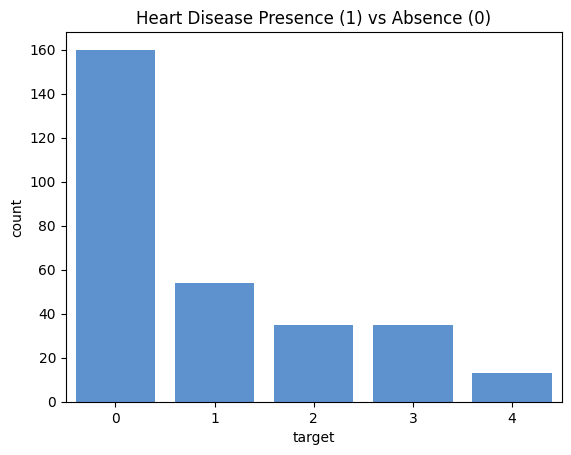

In [13]:
# Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence (1) vs Absence (0)')
plt.show()


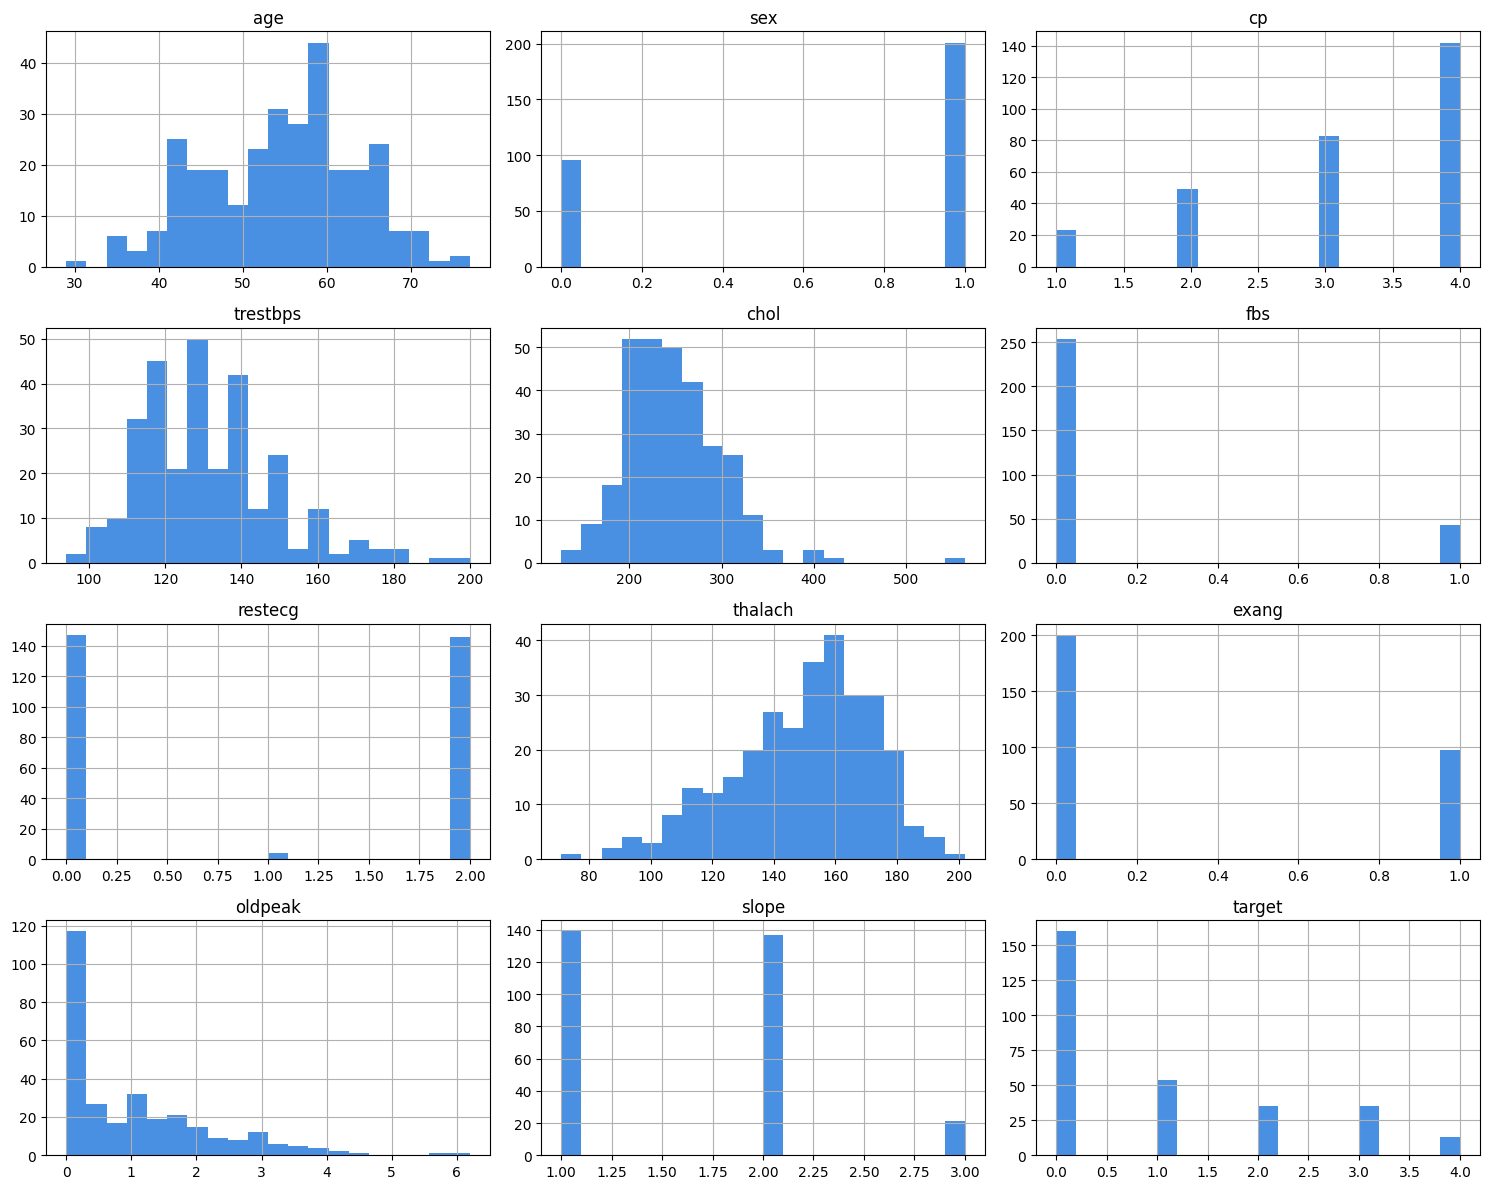

In [14]:
# Histograms
df.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.show()


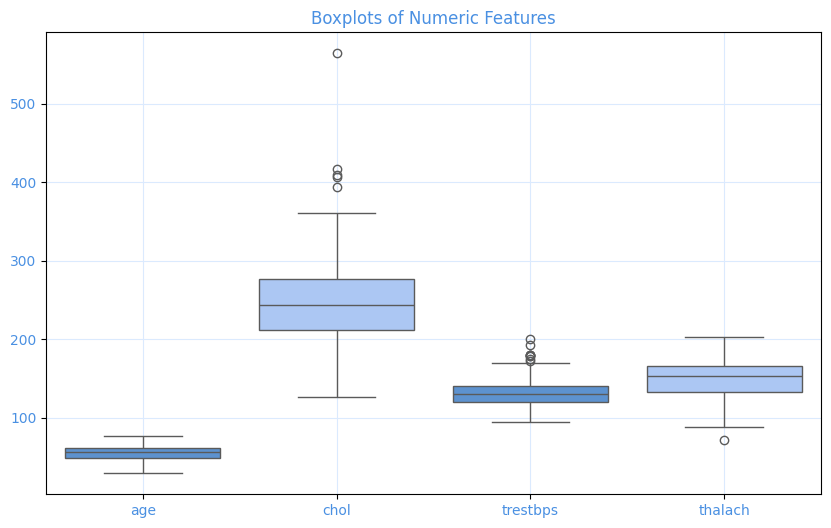

In [15]:
# BoxPlots
import seaborn as sns
colors = ['#4a90e2', '#a0c4ff', '#4a90e2', '#a0c4ff']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'chol', 'trestbps', 'thalach']],
            palette=colors)
plt.title('Boxplots of Numeric Features', color='#4a90e2')
plt.xticks(color='#4a90e2')
plt.yticks(color='#4a90e2')
plt.grid(True, color='#dbeafe')
plt.show()

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


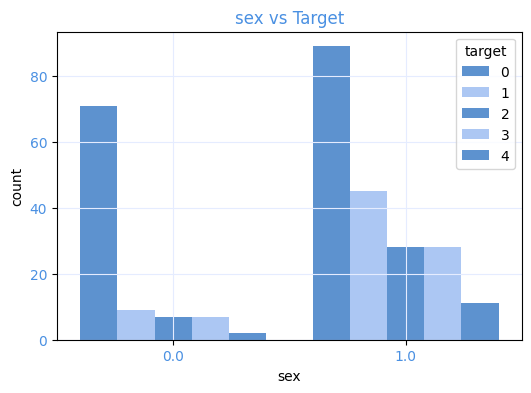

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


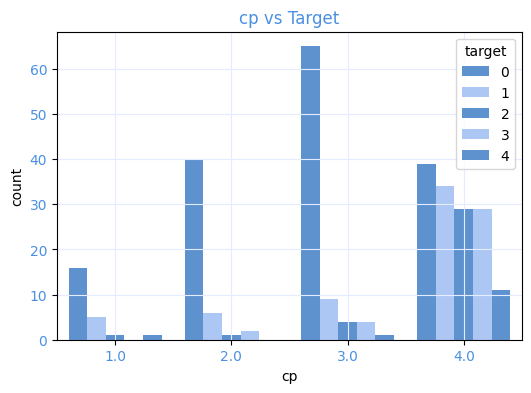

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


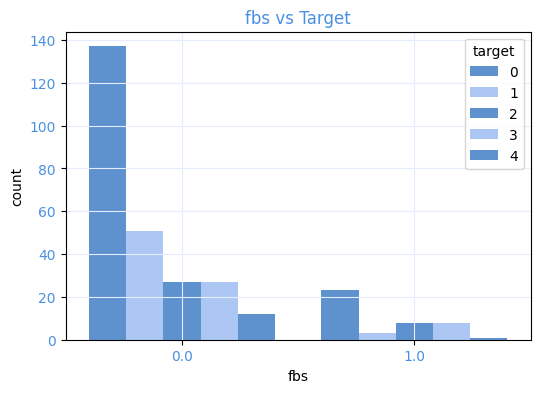

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


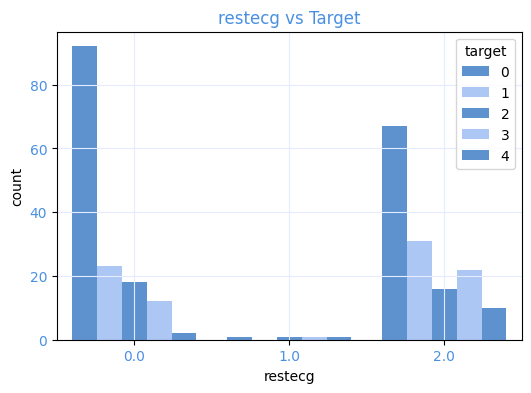

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


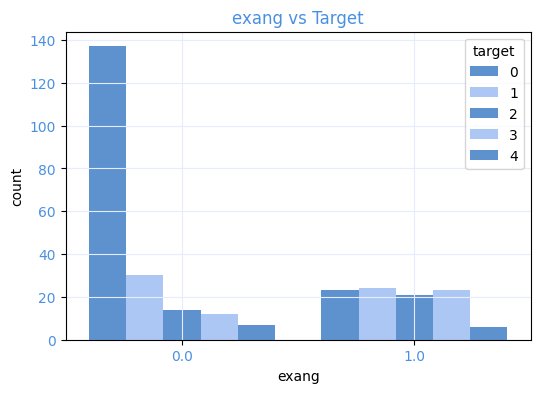

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


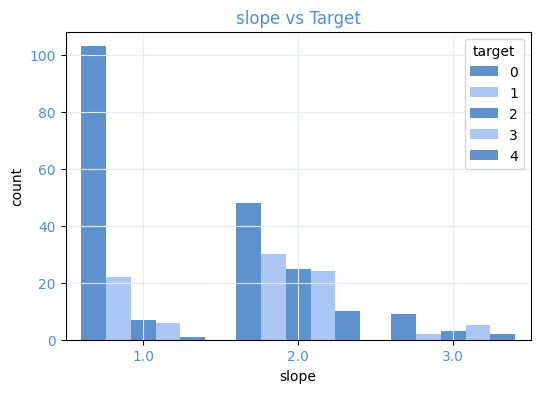

/tmp/ipykernel_6408/1969686889.py:6: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue='target', data=df, palette=custom_palette)


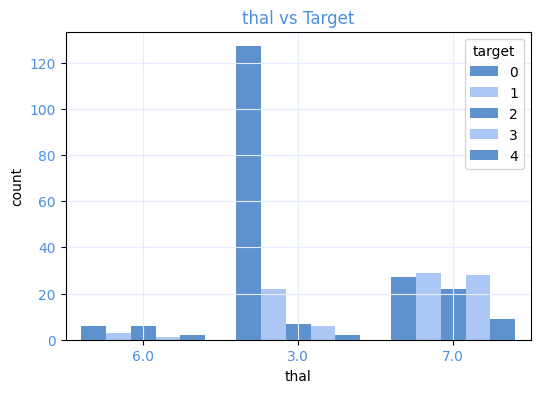

In [16]:
# correlation
custom_palette = ['#4a90e2', '#a0c4ff']

for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='target', data=df, palette=custom_palette)
    plt.title(f'{col} vs Target', color='#4a90e2')
    plt.xticks(color='#4a90e2')
    plt.yticks(color='#4a90e2')
    plt.grid(True, color='#e5ecff')
    plt.show()



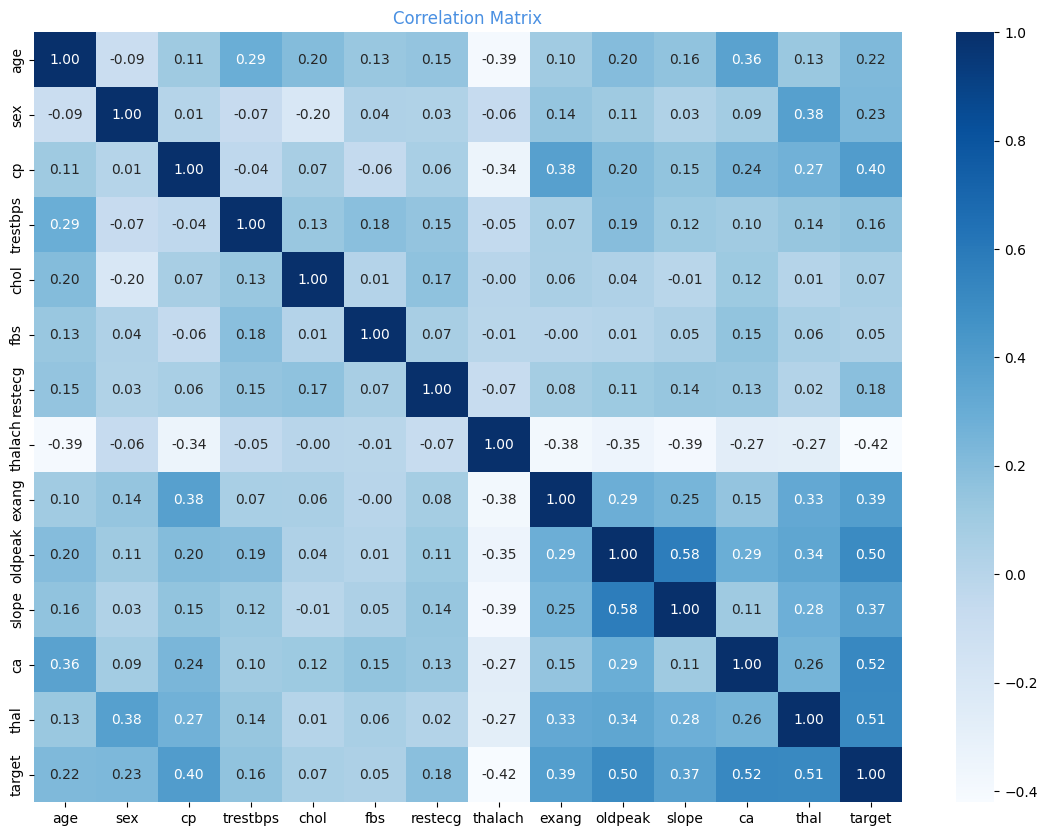

In [17]:

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', color='#4a90e2')
plt.show()



/home/youmna/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/home/youmna/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/home/youmna/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/home/youmna/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/home/youmna/.local/lib/python3.12/site-packages/seaborn/axisgri

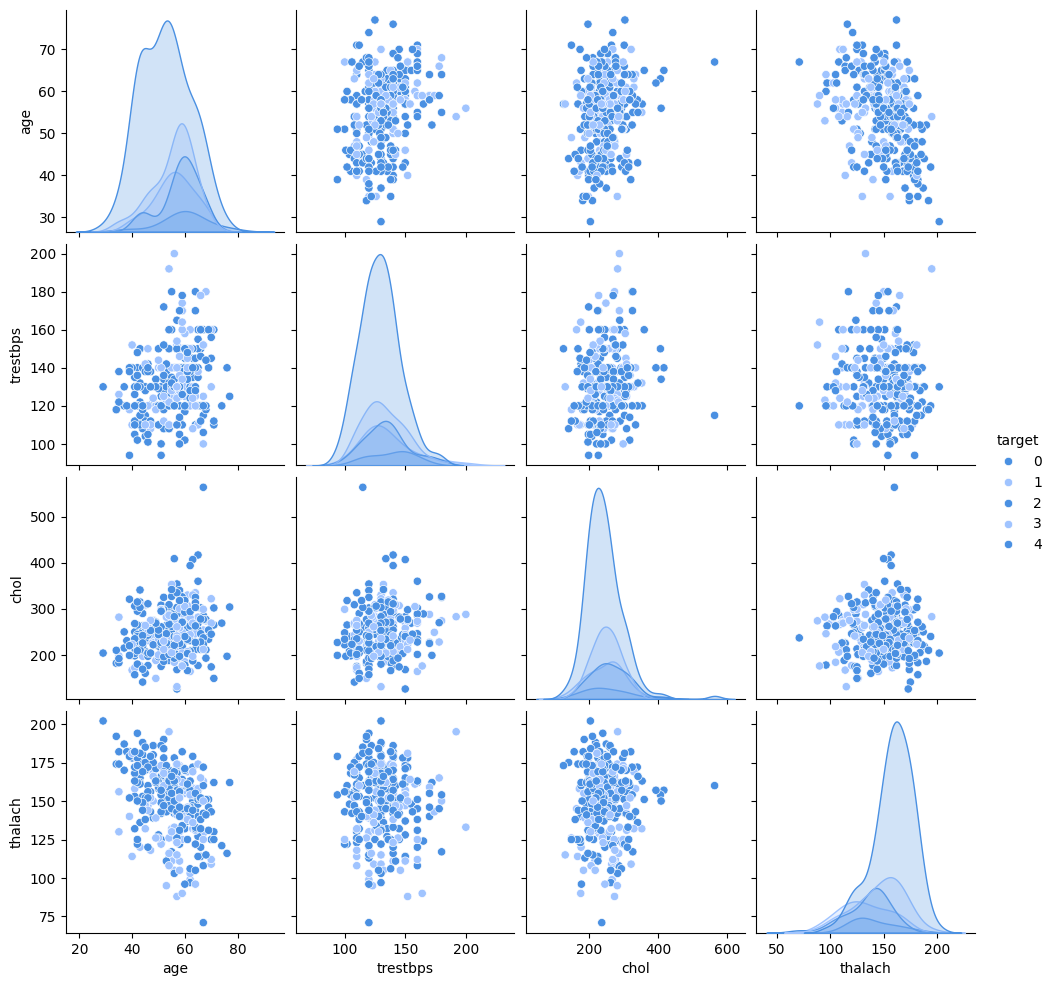

In [18]:
custom_palette = ['#4a90e2', '#a0c4ff']

sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']],
             hue='target',
             palette=custom_palette)



In [20]:

np.save('/home/youmna/Heart-Disease-Prediction/data/X_scaled.npy', x_scaled)
np.save('/home/youmna/Heart-Disease-Prediction/data/y.npy', y)